In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("data/tumor_diagnose.csv")

In [34]:
data = data.iloc[:,1:3]

In [35]:
print(data.shape)
data.head()

(569, 2)


,diagnosis,radius_mean
0,M,17.99
1,M,20.57
2,M,19.69
3,M,11.42
4,M,20.29


In [37]:
training_data = data.iloc[0:int(0.7*len(data))]
training_data.shape
training_data.head()

(398, 2)

,diagnosis,radius_mean
0,M,17.99
1,M,20.57
2,M,19.69
3,M,11.42
4,M,20.29


In [38]:
b_m_frequency = training_data['diagnosis'].value_counts()

In [42]:
b_m_frequency

B    225
M    173
Name: diagnosis, dtype: int64

In [43]:
b_m_frequency = np.array(b_m_frequency)

In [44]:
p_cap = b_m_frequency/training_data.shape[0]

In [45]:
p_cap[0] #Best Point Estimate of Probability of a Tumor being Benign 

0.5653266331658291

In [46]:
p_cap[1] #Best Point Estimate of Probability of a Tumor being Malignant

0.43467336683417085

In [48]:
b_training_data = training_data[training_data['diagnosis'] == 'B']

In [50]:
b_training_data.head()
b_training_data.shape

,diagnosis,radius_mean
19,B,13.540
20,B,13.080
21,B,9.504
37,B,13.030
46,B,8.196


(225, 2)

(array([ 1., 11., 18., 23., 47., 52., 45., 16.,  9.,  3.]),
 array([ 6.981 ,  7.9669,  8.9528,  9.9387, 10.9246, 11.9105, 12.8964,
        13.8823, 14.8682, 15.8541, 16.84  ]),
 <a list of 10 Patch objects>)

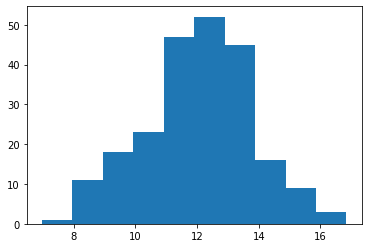

In [52]:
plt.hist(b_training_data['radius_mean'])

In [53]:
mu_cap = np.array([0.0,0.0])

In [54]:
sigma_cap = np.array([0.0,0.0])

In [55]:
mu_cap[0] = b_training_data['radius_mean'].mean()

sigma_cap[0] = b_training_data['radius_mean'].std()

In [56]:
m_training_data = training_data[training_data['diagnosis'] == 'M']

In [63]:
m_training_data.head()
m_training_data.shape

,diagnosis,radius_mean
0,M,17.99
1,M,20.57
2,M,19.69
3,M,11.42
4,M,20.29


(173, 2)

(array([ 9., 24., 37., 28., 31., 29.,  6.,  5.,  2.,  2.]),
 array([10.95 , 12.666, 14.382, 16.098, 17.814, 19.53 , 21.246, 22.962,
        24.678, 26.394, 28.11 ]),
 <a list of 10 Patch objects>)

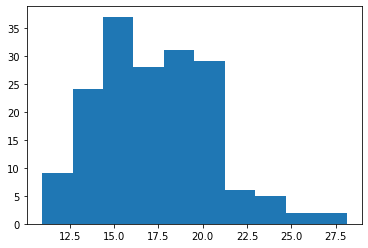

In [58]:
plt.hist(m_training_data['radius_mean'])

In [59]:
mu_cap[1] = m_training_data['radius_mean'].mean()

sigma_cap[1] = m_training_data['radius_mean'].std()

In [60]:
mu_cap

array([12.07644   , 17.27416185])

In [61]:
sigma_cap

array([1.73131519, 3.21519467])

In [67]:
remaining_data = data.iloc[int(0.7*len(data)):]

In [68]:
cross_validation_data = remaining_data.iloc[0:int(0.33*len(remaining_data))]

In [69]:
cross_validation_data.head()
cross_validation_data.shape

,diagnosis,radius_mean
398,B,11.06
399,B,11.80
400,M,17.91
401,B,11.93
402,B,12.96


(56, 2)

In [70]:
cross_validation_data['diagnosis'].replace(to_replace=['B','M'],value=[0,1],inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [71]:
cross_validation_data.head()

,diagnosis,radius_mean
398,0,11.06
399,0,11.80
400,1,17.91
401,0,11.93
402,0,12.96


In [72]:
cross_validation_x = np.array(cross_validation_data['radius_mean'])

In [73]:
import scipy.stats as s

In [74]:
def predicted_category(x):
    
    m_like = s.norm.pdf(x,mu_cap[1],sigma_cap[1])
    
    b_like = s.norm.pdf(x,mu_cap[0],sigma_cap[0])
    
    m_posterior = (m_like * p_cap[1])/(m_like*p_cap[1] + b_like*p_cap[0])
    
    return np.uint(m_posterior > 0.5)

In [75]:
predicted_class = predicted_category(cross_validation_x)

In [76]:
predicted_class

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=uint64)

In [77]:
actual_class = np.array(cross_validation_data['diagnosis'])

In [78]:
actual_class

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [79]:
correct_count = np.count_nonzero(predicted_class == actual_class)

In [80]:
correct_count

51

In [81]:
accuracy = correct_count/cross_validation_data.shape[0]

In [82]:
accuracy

0.9107142857142857

In [83]:
percent_accuracy = accuracy * 100

In [84]:
percent_accuracy

91.07142857142857

In [85]:
testing_data = remaining_data.iloc[int(0.33*len(remaining_data)):]

In [86]:
testing_data.head()

,diagnosis,radius_mean
454,B,12.62
455,B,13.38
456,B,11.63
457,B,13.21
458,B,13.00


In [87]:
train_x = np.array(training_data['radius_mean'])
predicted_class_train = predicted_category(train_x)

In [88]:
predicted_class_train

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [99]:

training_data.replace(to_replace=['B','M'],value=[0,1],inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [100]:
actual_class_train = np.array(training_data['diagnosis'])

In [101]:
actual_class_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [102]:
correct_count_train = np.count_nonzero(predicted_class_train == actual_class_train)

In [103]:
accuracy_train = correct_count_train/training_data.shape[0]
percent_accuracy_train = accuracy_train * 100

In [104]:
percent_accuracy_train

86.4321608040201

In [105]:
test_x = np.array(testing_data['radius_mean'])
predicted_class_test = predicted_category(test_x)

print(predicted_class_test)


testing_data.replace(to_replace=['B','M'],value=[0,1],inplace=True)

actual_class_test = np.array(testing_data['diagnosis'])

print(actual_class_test)

correct_count_test = np.count_nonzero(predicted_class_test == actual_class_test)

accuracy_test = correct_count_test/testing_data.shape[0]
percent_accuracy_test = accuracy_test * 100

print(percent_accuracy_test)




[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 0]
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 0]
91.30434782608695
